Alunos: João Martinho e Gustavo Guerreiro

# TRABALHO PARCIAL 01 [OPERADORES MORFOLÓGICOS]

Escolha e implemente um artigo que utilize as técnicas de Morfologia Matemática.  
Obs.: o artigo precisa ser validado com o professor.

Inicialmente, importa-se as bibliotecas matplotlib, cv2 e numpy para realizar as operações necessárias.

In [ ]:
%pip install matplotlib
%pip install opencv-python
%pip install numpy

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

## Extração da imagem

Para essa aplicação foi escolhida uma foto semelhante à utilizada no artigo original, na região do município de Santarém no Pará. O artigo faz uso de fotos do sensor TM (Thematic Mapper) obtidas através de satélites, apesar do método utilizado para extração de imagens não ser explícito, considerando as referências utilizadas e a utilização da imagem em três bandas (3, 4 e 5), entendeu-se que o satélite utilizado foi o Landset 5, que separa as imagens em três bandas (faixas de comprimento de onda registradas pelo sensor). Nesse caso as faixas de bandas utilzadas pelos autores foram:

| Banda | Faixa Espectral $\mu\text{m}$ |
|----------|----------|
| 3 (Vermelho) | 0,63 – 0,69 |
| 4 (Infravermelho próximo) | 0,76 – 0,90 |
| 5 (Infravermelho médio) | 1,55 – 1,75 |

As imagens detectadas por esse satélite estão disponíveis no serviço EarthExplorer da USGS (United States Geological Survey), neste serviço foi feita uma busca pelo dataset Landsat 4-5 TM C2 L1, e uma foto da região metropolitana de Santarém com baixa densidade de nuvens (como o artigo sugere) foi escolhida. Para se assemelhar mais ao artigo original, as imagens adquiridas no EarthExplorer foram recortadas para abrangerem apenas a região de Santarém.

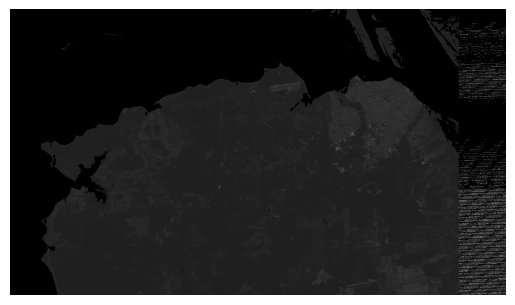

In [109]:
imagem = cv2.imread('Santarem3semagua.tif')
plt.axis('off')

plt.imshow(imagem)

## Tratamento da imagem

Tendo a imagem extraída e com seu brilho aumentado para facilitar a vizualização, aplica-se a binzarização para ficar apenas com os principais elementos da imagem.

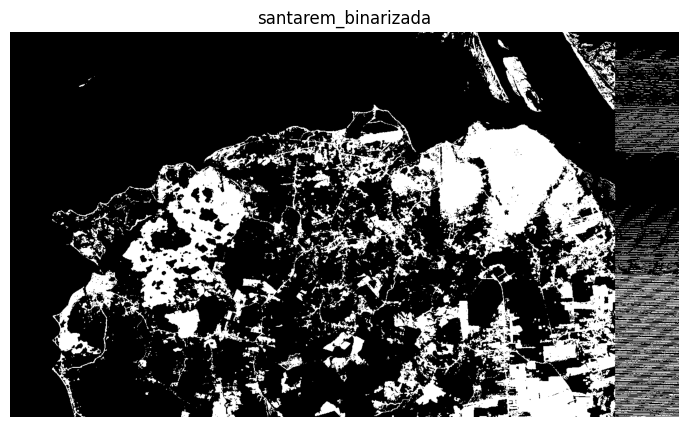

In [110]:
(T, binaria) = cv2.threshold(imagem, 33, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(10, 5))
plt.title('santarem_binarizada')
plt.axis("off")
plt.imshow(binaria)

O artigo original usa um elemento estrurante (também chamado de *kernel*) de formato octogonal,  tal formato foi reproduzido em uma matriz 5x5.

In [67]:
kernel = np.array([
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0]
], dtype=np.uint8)

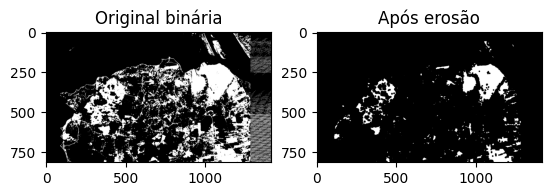

In [111]:
erodida = cv2.erode(binaria, kernel, iterations=2)

plt.subplot(1,2,1)
plt.title("Original binária")
plt.imshow(binaria)

plt.subplot(1,2,2)
plt.title("Após erosão")
plt.imshow(erodida)
plt.show()

Referências:

GUERRA, Carlos Eduardo. **Detecção de zonas de baixa cobertura vegetal em imagens de satélites através do uso de operadores da Morfologia Matemática**. SIMPÓSIO BRASILEIRO DE SENSORIAMENTO REMOTO, 13., 2007, Florianópolis.

U.S. GEOLOGICAL SURVEY. **EarthExplorer**. [S. l.]. Disponível em: https://earthexplorer.usgs.gov/. Acesso em: 6 set. 2025.

U.S. GEOLOGICAL SURVEY. **What are the band designations for Landsat satellites?**. [S. l.]. Disponível em: https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites. Acesso em: 6 set. 2025.